# First Principles Thinking

* Step 1: Identify any assumptions that you may have (batteries are $600/KwH - they're too expensive)
* Step 2: Breakdown the issues (the fundamentals - what materials go into a battery? Can I find them for cheap?)
* Step 3: Create new solutions (use your fundamental analysis and knowledge to create a solution)

https://www.youtube.com/watch?v=NV3sBlRgzTI

```
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
(
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('Class {}'.format, axis='columns')
    .style.format('{:.2%}')
)

```



In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
%cd '/content/drive/My Drive/Kaggle'

/content/drive/My Drive/Kaggle


In [72]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
# y_true / y_pred
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Preprocessing SKLearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Model(s)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

# Import the data 
df = pd.read_csv('titanic_train.csv')
df_copy = df.copy()

len(df), len(df_copy)

(850, 850)

# Pandas

In [73]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [74]:
df.drop(['cabin','boat','body','home.dest'], axis=1, inplace=True)
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          1
survived          0
dtype: int64

In [75]:
df_copy = df.copy()

In [76]:
df_copy.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived'],
      dtype='object')

In [77]:
# df = Sklearn for preprocessing (Model)
# df_copy = Pandas for preprocessing

df_copy_2 = df_copy.copy()
df_copy.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


In [78]:
len(df_copy.passenger_id.unique())

850

In [79]:
df_copy.passenger_id.nunique()

850

In [80]:
len(df_copy)

850

In [81]:
df_copy.join(df_copy_2, on='passenger_id')

ValueError: ignored

In [82]:
df_copy_2.rename({'passenger_id':'id', 'pclass':'class', 'name':'p_name', 
            'sex':'gender', 'age':'p_age', 'sibsp':'siblings', 'parch':'parents',
             'ticket':'p_ticket', 'fare':'p_fare', 'embarked':'p_embarked', 'survived':'p_survived'}
             , axis='columns', inplace=True)

In [83]:
df_copy_2.columns

Index(['id', 'class', 'p_name', 'gender', 'p_age', 'siblings', 'parents',
       'p_ticket', 'p_fare', 'p_embarked', 'p_survived'],
      dtype='object')

In [84]:
df_copy = df_copy.join(df_copy_2, how='left', lsuffix='passenger_id', rsuffix='id')
df_copy.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,id,class,p_name,gender,p_age,siblings,parents,p_ticket,p_fare,p_embarked,p_survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,1,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


In [85]:
df_copy.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived', 'id', 'class', 'p_name',
       'gender', 'p_age', 'siblings', 'parents', 'p_ticket', 'p_fare',
       'p_embarked', 'p_survived'],
      dtype='object')

In [86]:
df_copy.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          1
survived          0
id                0
class             0
p_name            0
gender            0
p_age           174
siblings          0
parents           0
p_ticket          0
p_fare            1
p_embarked        1
p_survived        0
dtype: int64

In [87]:
df_copy.age.fillna(value= df_copy.age.mean(), inplace=True)
df_copy.fare.fillna(value= df_copy.fare.median(), inplace=True)
df_copy.embarked.fillna(value='S', inplace=True)

df_copy.p_age.fillna(value= df_copy.age.mean(), inplace=True)
df_copy.p_fare.fillna(value= df_copy.fare.median(), inplace=True)
df_copy.p_embarked.fillna(value='S', inplace=True)

df_copy.isna().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
id              0
class           0
p_name          0
gender          0
p_age           0
siblings        0
parents         0
p_ticket        0
p_fare          0
p_embarked      0
p_survived      0
dtype: int64

In [88]:
df_copy.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked         object
survived          int64
id                int64
class             int64
p_name           object
gender           object
p_age           float64
siblings          int64
parents           int64
p_ticket         object
p_fare          float64
p_embarked       object
p_survived        int64
dtype: object

In [89]:
df_copy.drop(['fare','p_fare','p_name','name'],axis=1,inplace=True)
df_copy.columns

Index(['passenger_id', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'embarked', 'survived', 'id', 'class', 'gender', 'p_age', 'siblings',
       'parents', 'p_ticket', 'p_embarked', 'p_survived'],
      dtype='object')

In [90]:
df_copy.describe()

,passenger_id,pclass,age,sibsp,parch,survived,id,class,p_age,siblings,parents,p_survived
count,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,0.368235,662.816471,2.32000,29.519847,0.522353,0.382353,0.368235
std,380.751936,0.83853,12.984533,1.112132,0.879511,0.482610,380.751936,0.83853,12.984533,1.112132,0.879511,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000
25%,332.250000,2.00000,22.000000,0.000000,0.000000,0.000000,332.250000,2.00000,22.000000,0.000000,0.000000,0.000000
50%,676.500000,3.00000,29.519847,0.000000,0.000000,0.000000,676.500000,3.00000,29.519847,0.000000,0.000000,0.000000
75%,992.250000,3.00000,34.875000,1.000000,0.000000,1.000000,992.250000,3.00000,34.875000,1.000000,0.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,1.000000,1307.000000,3.00000,80.000000,8.000000,9.000000,1.000000


In [91]:
df_copy = pd.get_dummies(data=df_copy, columns=['embarked','p_embarked','sex','gender'])
df_copy.head()

,passenger_id,pclass,age,sibsp,parch,ticket,survived,id,class,p_age,siblings,parents,p_ticket,p_survived,embarked_C,embarked_Q,embarked_S,p_embarked_C,p_embarked_Q,p_embarked_S,sex_female,sex_male,gender_female,gender_male
0,1216,3,29.519847,0,0,335432,1,1216,3,29.519847,0,0,335432,1,0,1,0,0,1,0,1,0,1,0
1,699,3,38.000000,0,0,315089,0,699,3,38.000000,0,0,315089,0,0,0,1,0,0,1,0,1,0,1
2,1267,3,30.000000,1,1,345773,0,1267,3,30.000000,1,1,345773,0,0,0,1,0,0,1,1,0,1,0
3,449,2,54.000000,1,3,29105,1,449,2,54.000000,1,3,29105,1,0,0,1,0,0,1,1,0,1,0
4,576,2,40.000000,0,0,28221,0,576,2,40.000000,0,0,28221,0,0,0,1,0,0,1,0,1,0,1


# Scikit-Learn

In [92]:
# Build pipeline
df.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked         object
survived          int64
dtype: object

In [93]:
df.drop(['name','ticket'],axis=1, inplace=True)
df.isna().sum()

passenger_id      0
pclass            0
sex               0
age             174
sibsp             0
parch             0
fare              1
embarked          1
survived          0
dtype: int64

In [ ]:
# Pipeline
# Cateogries
categorical_columns = ['embarked']
categorical_transform = Pipeline(steps=[
             ('imputer', SimpleImputer(fill_value='S', strategy='constant')),
             ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])


# Average
avg_columns = ['fare','age']
avg_transform = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean'))
])

# ColumnTransformer
column_transform = ColumnTransformer(transformers=[
                      ('cat', categorical_transform, categorical_columns),
                      ('avg', avg_transform, avg_columns)
])


# Preprocess
model = Pipeline(steps=[
         ('preprocess', column_transform),
        ('model', LogisticRegression())
])

# Split & Seed
np.random.seed(42)

X = df.drop('survived', axis=1)
y = df.survived

# Split into Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fit
model.fit(X_train,y_train)

# Score
model.score(X_test,y_test)

# Evaluate the Scores

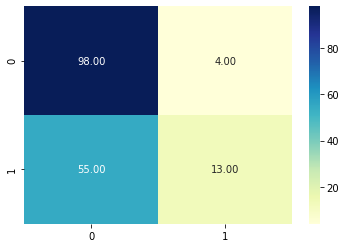

In [94]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,
            cmap='YlGnBu',
            fmt='.2f',
            annot=True);

In [95]:
# Accuracy and all the rest
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.64      0.96      0.77       102\n           1       0.76      0.19      0.31        68\n\n    accuracy                           0.65       170\n   macro avg       0.70      0.58      0.54       170\nweighted avg       0.69      0.65      0.58       170\n'

In [96]:
print(accuracy_score(y_test,y_pred), 'accuracy')
print(precision_score(y_test,y_pred), 'precision')
print(f1_score(y_test,y_pred), 'f1')
print(recall_score(y_test,y_pred), 'recall')

0.6529411764705882 accuracy
0.7647058823529411 precision
0.3058823529411765 f1
0.19117647058823528 recall


In [97]:
df_copy.isna().sum()

passenger_id     0
pclass           0
age              0
sibsp            0
parch            0
ticket           0
survived         0
id               0
class            0
p_age            0
siblings         0
parents          0
p_ticket         0
p_survived       0
embarked_C       0
embarked_Q       0
embarked_S       0
p_embarked_C     0
p_embarked_Q     0
p_embarked_S     0
sex_female       0
sex_male         0
gender_female    0
gender_male      0
dtype: int64

In [100]:
df_copy.dtypes

passenger_id       int64
pclass             int64
age              float64
sibsp              int64
parch              int64
ticket            object
survived           int64
id                 int64
class              int64
p_age            float64
siblings           int64
parents            int64
p_ticket          object
p_survived         int64
embarked_C         uint8
embarked_Q         uint8
embarked_S         uint8
p_embarked_C       uint8
p_embarked_Q       uint8
p_embarked_S       uint8
sex_female         uint8
sex_male           uint8
gender_female      uint8
gender_male        uint8
dtype: object

In [101]:
df_rerun = df_copy.drop(['p_survived','p_ticket','ticket'], axis=1)

X = df_rerun.drop('survived', axis=1)
y = df_rerun.survived


cross_val_score(RandomForestClassifier(), X = X, y = y,
                cv=5, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


array([0.82352941, 0.80588235, 0.79411765, 0.77647059, 0.84117647])

In [106]:
KNeighborsClassifier.get_params(KNeighborsClassifier)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


{'algorithm': None,
 'leaf_size': None,
 'metric': None,
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': None,
 'p': None,
 'weights': None}

In [111]:
# Split data again into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create the param for RandomizedSearchCV and GridSearchCV
knn_params = {
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [30,60,90],
 'weights': ['distance','uniform']
}

In [115]:
rs_knc = RandomizedSearchCV(estimator = KNeighborsClassifier(), 
                            param_distributions= knn_params, cv=5, n_iter=20,
                            verbose=2, random_state=42)
rs_knc.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=distance, leaf_size=60, algorithm=ball_tree .............
[CV]  weights=distance, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=distance, leaf_size=60, algorithm=ball_tree .............
[CV]  weights=distance, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=distance, leaf_size=60, algorithm=ball_tree .............
[CV]  weights=distance, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=distance, leaf_size=60, algorithm=ball_tree .............
[CV]  weights=distance, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=distance, leaf_size=60, algorithm=ball_tree .............
[CV]  weights=distance, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=distance, leaf_size=90, algorithm=kd_tree ...............
[CV]  weights=distance, leaf_size=90, algorithm=kd_tree, total=   0.0s
[CV] weights=distance, leaf_size=90, algorithm=kd_tree ...............
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, leaf_size=90, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=90, algorithm=ball_tree ..............
[CV]  weights=uniform, leaf_size=90, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=90, algorithm=ball_tree ..............
[CV]  weights=uniform, leaf_size=90, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=60, algorithm=ball_tree ..............
[CV]  weights=uniform, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=60, algorithm=ball_tree ..............
[CV]  weights=uniform, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=60, algorithm=ball_tree ..............
[CV]  weights=uniform, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=60, algorithm=ball_tree ..............
[CV]  weights=uniform, leaf_size=60, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, leaf_size=60, algorithm=ball_tree ..............

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


{'algorithm': 'ball_tree', 'leaf_size': 60, 'weights': 'distance'}

In [118]:
print(rs_knc.best_params_)
print(rs_knc.best_score_)

{'weights': 'distance', 'leaf_size': 60, 'algorithm': 'ball_tree'}
0.6776470588235294
